<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/HGMachine/chapter06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **차원**

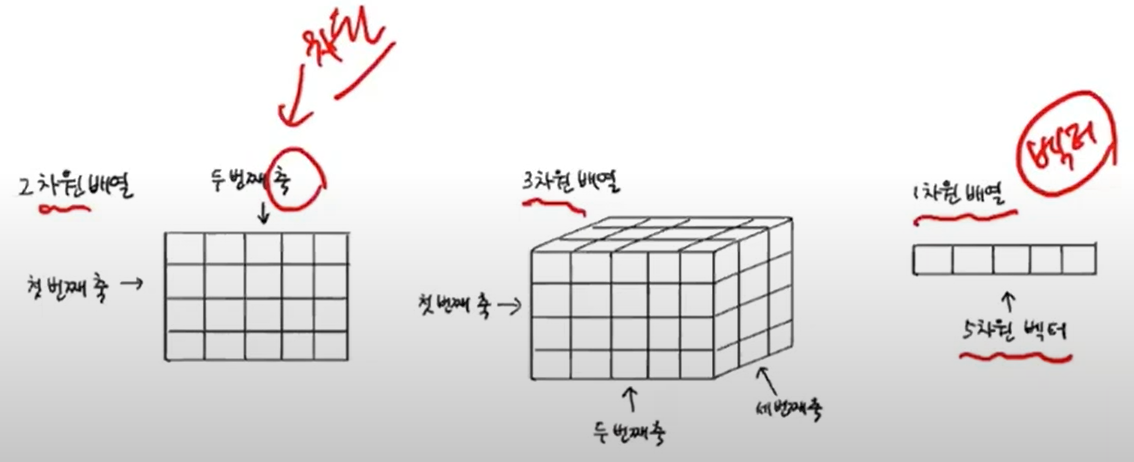

차원이란 용어는 두 가지 의미로 많이 사용한다.

다차원 배열에서 차원은 배열의 축 개수가 된다.

1차원 배열, 즉 벡터일 경우에는 차원은 원소의 개수가 된다.

예를 들어서, 여러 개의 샘플이 있고, 그 샘플의 특성은 3가지다.

그러면 배열로 봤을 때는 2차원이지만 벡터로 봤을 때는 3차원인 것이다.

# **차원 축소**

과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성, 즉 10,000차원인 것이다. 

이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.

즉 차원 축소는 벡터로서의 차원을 축소하는 것이다.

특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 과대적합된다는 것을 배웠다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.

# **주성분 분석(PCA, Principal Component Analysis)**

PCA는 대표적인 차원 축소 알고리즘으로 데이터에 있는 분산(데이터가 널리 퍼져있는 정도)이 큰 방향을 찾는 것이다.

분산이 큰 방향은 그 데이터를 잘 표현하는 가장 적합한 벡터로 생각할 수 있다.

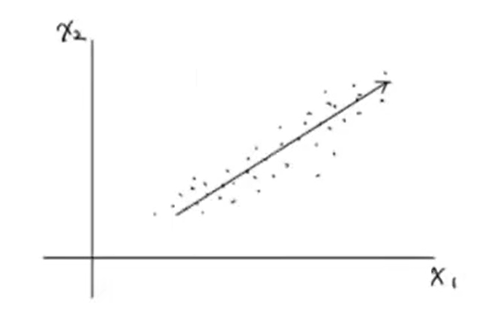

데이터가 x1, x2 두 개의 특성이 있다면 대각선 방향으로 길게 늘어진 형태를 가지고 있는 것을 알 수 있다.

그러면 직관적으로 봤을 때 길게 늘어진 대각선 방향이 분산이 가장 크다는 것을 알 수 있다.(화살표 방향은 큰 의미X)

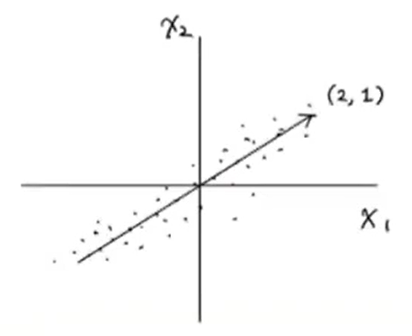

앞에서 찾은 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있다.

이 벡터를 주성분(Principal Component)이라고 부른다.

이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다.

따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

※ 참고 ※

사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰준다. 따라서 우리가 수동으로 데이터를 원점에 맞출 필요는 없다.



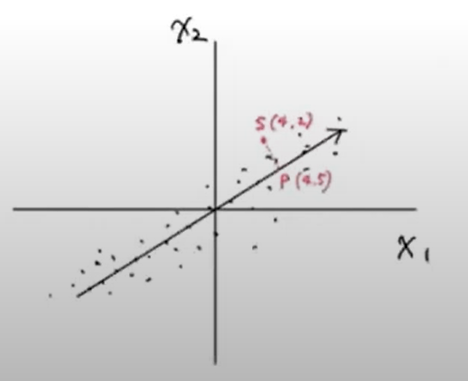

예를 들어서, 샘플 데이터 S(4, 2)를 주성분에 직각으로 투영하면 1차원 데이터 P(4.5)를 만들 수 있다.

즉 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 것이다.

주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

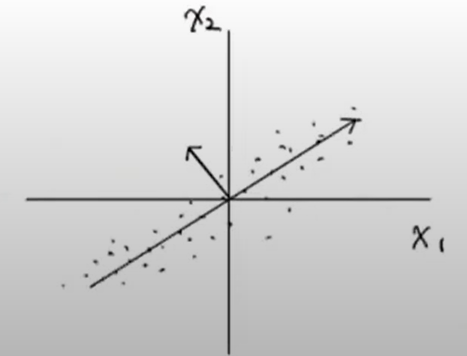

첫 번째 주성분을 찾은 다음 이 벡터에수직이고 분산이 가장 큰 다음 방향을 찾을 수 있다.

일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.

여기서는 특성이 2개, 2차원이기 때문에 두 번째 주성분의 방향은 위처럼 하나뿐이다.

# **PCA 클래스**

In [66]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2021-12-31 12:43:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-12-31 12:43:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-12-31 12:43:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

이전과 동일하게 과일 사진 데이터를 다운로드하여 넘파이 배열로 준비한다.

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

사이킷런은 차원 축소 기능을 decomposition 모듈 하위에 제공한다. 

주성분 분석 알고리즘은 PCA 클래스를 임포트해서 객체를 만들어서 사용하면 된다.

이때 n_components 매개변수에 주성분의 개수를 지정해야 한다.

※ 과일 데이터는 10,000개의 특성, 즉 10,000 차원으로 10,000개의 주성분을 찾을 수 있지만 50개로 지정하였다.

k-평균과 마찬가지로 비지도 학습이기 때문에 fit()메소드에 타깃값을 전달하면 안된다.

In [68]:
print(pca.components_.shape)

(50, 10000)


학습이 완료되면 PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다.

n_components = 50으로 지정했기 때문에 배열의 첫 번째 차원은 50이다. 즉 50개의 주성분을 찾은 것이다.

두 번째 차원은 원본 데이터의 특성 개수와 같은 10,000이다.

In [69]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

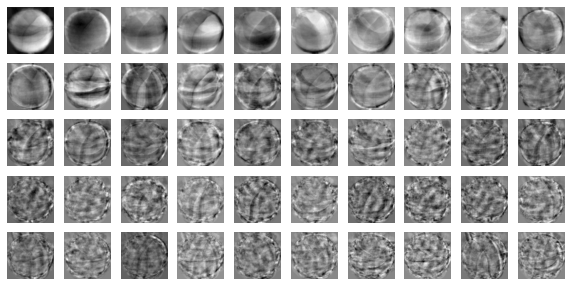

In [70]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력할 수 있다.

2절에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그려보았다.

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

주성분이 마치 데이터셋에 있는 어떤 특징, 패턴들을 학습한 것처럼 볼 수 있다.

In [71]:
print(fruits_2d.shape)

(300, 10000)


In [72]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 볼 수 있다.

PCA의 transform()메소드를 사용하여 원본 데이터의 차원을 50으로 줄이면 된다.

---

그러면 (300, 100000) 크기의 배열이었던 10,000개의 픽셀(특성)을 가진 300개의 이미지가 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환한다.

# **원본 데이터 재구성**

10,000개의 특성을 50개로 줄였으니 어느 정도 손실이 발생할 수 있다.

하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

In [73]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


PCA 클래스는 PCA객체로 변환한 데이터(300, 50)를 다시 원본 데이터(300, 10000)로 복원하는 inverse_transform() 메소드를 제공한다.

앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원해보았다.

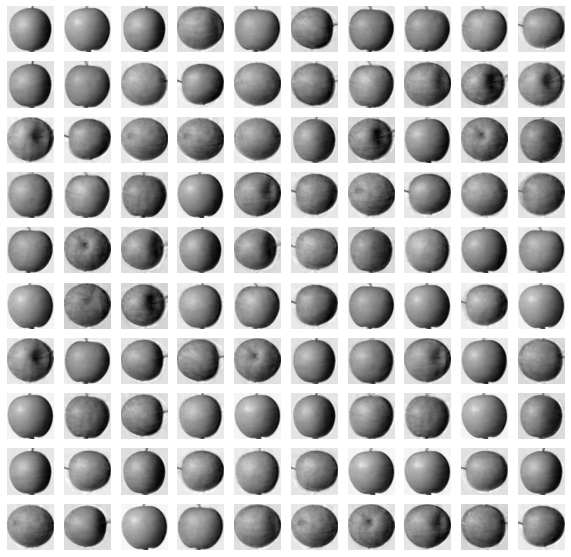

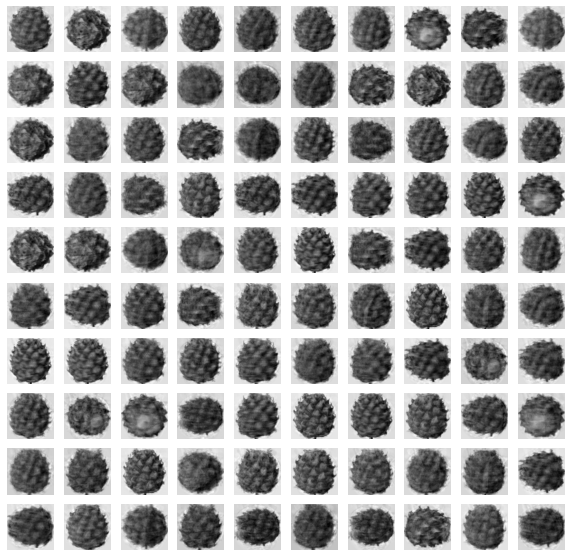

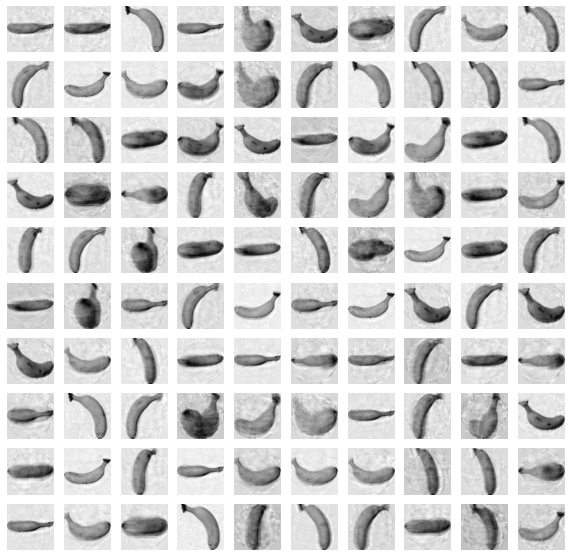

In [74]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start: start+100])
  print()

일부 흐리고 번진 부분이 있지만 전반적으로 육안으로 봤을 때 어느 것이 사과이고, 바나나이고, 파인애플인지 잘 구분할 수 있도록 재구성이 되었다.

10,000개에서 1/200로 줄인 50개의 특성이 주성분으로, 즉, 분산을 잘 보존하도록 변환된 것이기 때문에 불과 50개의 특성을 10,000개로 늘린 것은 놀라운 일이다. 

# **설명된 분산**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.

In [75]:
print(np.sum(pca.explained_variance_ratio_))

0.9214882610716247


PCA 클래스의 explained_variance_ratio_ 속성에 각 주성분의 설명된 분산 비율이 기록되어 있다.

당연히 첫 번째 주성분의 설명된 분산이 가장 크고, 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

---

92%가 넘는 분산을 유지하고 있다.

앞에서 50개의 특성에서 원본 데이터를 복원했을 때 잘 보존된 이유다.

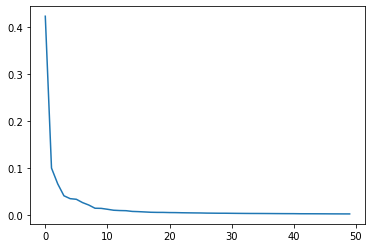

In [76]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾을 수 있다.

---

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다.

# **PCA와 분류기**

PCA는 저장 공간을 줄이는 것뿐만 아니라 다른 분류기나 알고리즘과 사용하는 경우가 많다.

그렇기때문에 transform()메소드가 있는 것이다. 변환기가 있다는 것은 다른 모델과 그 다음의 모델과 연결해서 사용할 수 있다는 것이다.

이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델(분류기)을 훈련하려 한다.

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용했다

In [78]:
target = np.array([0]*100 + [1]*100 + [2]*100)

지도 학습 모델을 사용하려면 타깃값이 있어야 한다.

3개의 과일을 사과는 0, 파인애플은 1, 바나나는 2로 지정해서 3개의 클래스 레이블로 타깃을 만들었다.

In [79]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5134355545043945


교차 검증의 점수는 약 0.997 정도로 매우 높다.

특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다.

cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있다.

약 1.5초 정도 걸렸다

In [80]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03519282341003418


PCA로 축소한 데이터로 훈련했을 때는 50개의 특성만 사용했는데도 정확도가 100%이고 훈련 시간은 0.03초로 감소했다.

로지스틱 회귀를 교차검증을 수행했을 때 첫 번째 모델은 10,000개의 차원을 사용했기 때문에 가중치도 많고, 처리할 계산도 많다.

두 번째 모델은 50개의 차원을 사용했기 때문에 굉장히 빠른 것이다.

이렇게 PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도로 높일 수 있다.

In [81]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

앞에서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다.

매개변수에 0~1 사이의 실수를 입력하여 설명된 분산의 비율을 지정할 수 있다.

그러면 PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

In [82]:
print(pca.n_components_)

2


PCA의 n_components_ 속성에 찾은 주성분의 개수가 있다.

In [83]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


이 모델로 원본 데이터를 변환하면 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)다.

300개의 샘플이 2개의 특성을 가지고 있다.

In [84]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05123248100280762


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


※ 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고가 출력된다.

하지만 교차 검증의 결과가 충분히 좋기 때문에 무시해도 좋다.

2개의 특성을 사용하여 교차 검증을 수행하니 99%의 정확도를 달성했다.

그러면 이 데이터셋은 10,000개의 특성이 있지만 다 사용할 필요는 없고, 2개의 특성으로 충분히 분류기를 학습할 수 있다고 생각할 수 있다.

# **PCA와 군집**

In [85]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


당연히 클러스터의 개수를 3개로 지정했으니 클래스가 0, 1, 2로 3개

fruits_pca로 찾은 클러스트는 0인덱스에 110개, 1인덱스에 99개, 2인덱스에 91개의 샘플을 포함하고 있다.

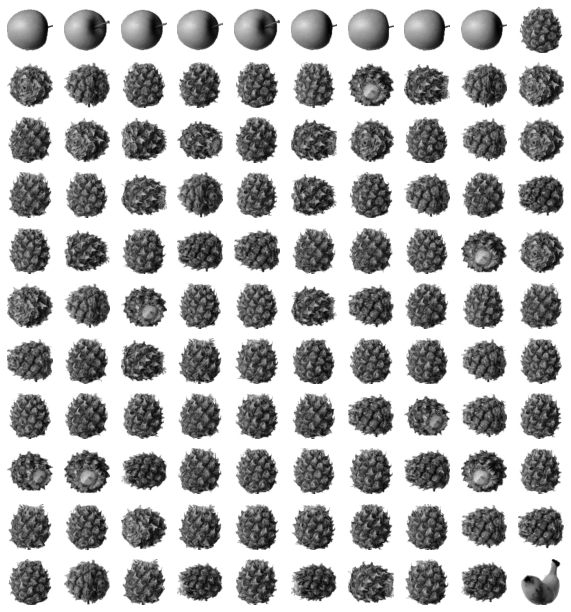

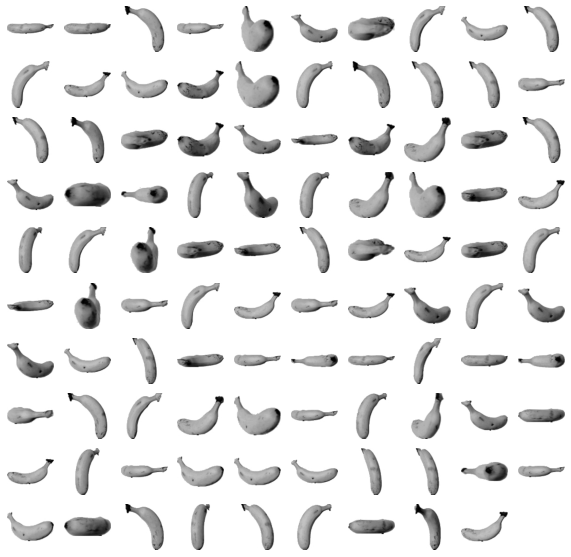

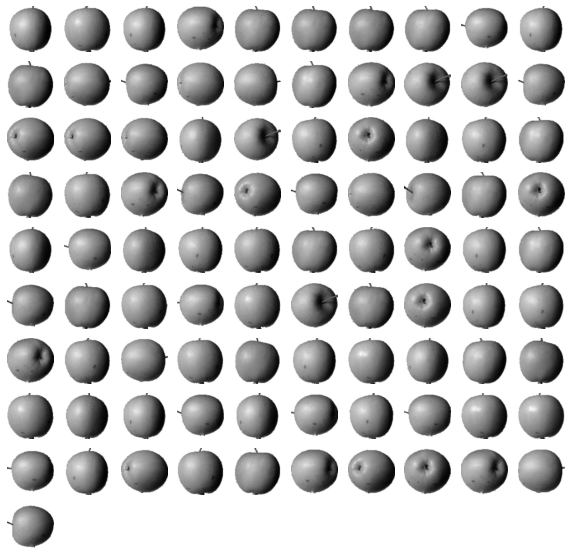

In [86]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print()

이전과 비슷하게 파인애플은 사과와 혼돈되는 면이 있다.

하지만 2개의 특성으로 좋은 결과를 만들어낸 것이다.

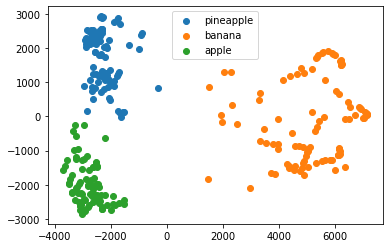

In [87]:
for label in range(0, 3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점이 시각화이다.

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.

fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.

---

각 클러스터별로 나누어 산점도를 그려보니 2개의 특성만을 사용했는데 로지스틱 회귀 모델이 잘 분류했을 것으로 예상이 되고, 교차 검증 점수가 높은 이유를 알 수 있다.

그리고 사과와 파인애플 클러스터의 경계가 가깝에 붙어있다. 

그렇기 때문에 KMeans 알고리즘을 사용했을 때 사과와 파인애플 몇 개가 혼동을 일으킨 것이다.

---

이렇게 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다.